In [13]:
from sympy import simplify, lambdify, latex, Symbol
from sympy.abc import k, n, c
from sympy.concrete.summations import summation
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

p = Symbol('p', positive=True)

In [14]:
pmf = p * (1 - p) ** (n - k)
cdf = (1 - p) ** (n - k)
ev = simplify(summation(k * pmf, (k, 0, n)))
var = summation((k**2)*p*(1-p)**(n-k), (k, 0, n))-ev**2

In [15]:
ev_nhg_eq = p * n * ((n + 1) / (p * n + 1))

In [16]:
ev_l = lambdify((p, n), ev)
ev_nhg_eq_l = lambdify((p, n), ev_nhg_eq)

In [17]:
_ns = (10, 50, 100)
_ps = (0.1, 0.5, 0.9)

for _nsi in _ns:
    for _psi in _ps:
        print(f"N={_nsi} | p={_psi} -> ev={ev_l(_psi, _nsi)} | ev_ngh_eq={ev_nhg_eq_l(_psi, _nsi)}")

N=10 | p=0.1 -> ev=4.138105960900001 | ev_ngh_eq=5.5
N=10 | p=0.5 -> ev=9.0009765625 | ev_ngh_eq=9.166666666666666
N=10 | p=0.9 -> ev=9.8888888889 | ev_ngh_eq=9.9
N=50 | p=0.1 -> ev=41.04638397686588 | ev_ngh_eq=42.5
N=50 | p=0.5 -> ev=49.0 | ev_ngh_eq=49.03846153846154
N=50 | p=0.9 -> ev=49.888888888888886 | ev_ngh_eq=49.891304347826086
N=100 | p=0.1 -> ev=91.00023905258999 | ev_ngh_eq=91.81818181818181
N=100 | p=0.5 -> ev=99.0 | ev_ngh_eq=99.01960784313725
N=100 | p=0.9 -> ev=99.88888888888889 | ev_ngh_eq=99.89010989010988


In [18]:
ev_lv = np.vectorize(ev_l, excluded=['n'])
ev_nhg_eq_lv = np.vectorize(ev_nhg_eq_l, excluded=['n'])

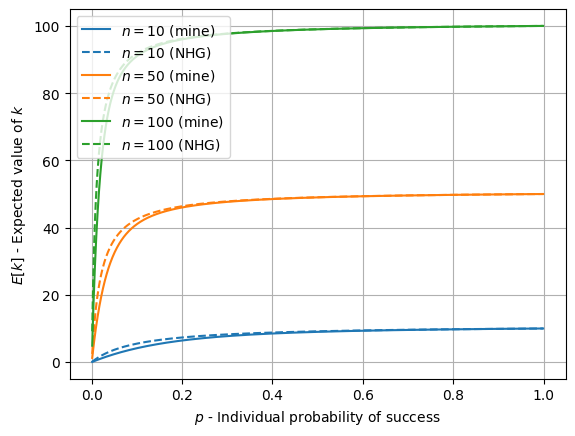

In [20]:
_ps = np.linspace(0.001,0.999,1000)
fig, ax = plt.subplots()
for _nsi in _ns:
    ax.plot(_ps, ev_lv(_ps, _nsi), label=f"$n={_nsi}$ (mine)")
    ax.plot(_ps, ev_nhg_eq_lv(_ps, _nsi), label=f"$n={_nsi}$ (NHG)", linestyle='dashed', color=plt.gca().lines[-1].get_color())
ax.legend()
ax.set_xlabel("$p$ - Individual probability of success")
ax.set_ylabel("$E[k]$ - Expected value of $k$")
ax.grid()